In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.listdir("../input"))

['DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv', 'DataCoSupplyChainDataset.csv']


In [3]:
desc = pd.read_csv("../input/DescriptionDataCoSupplyChain.csv")
token = pd.read_csv("../input/tokenized_access_logs.csv")

In [40]:
#Data Description
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FIELDS       52 non-null     object
 1   DESCRIPTION  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [41]:
desc

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


# 1.Data preparation

In [4]:
data = pd.read_csv('../input/DataCoSupplyChainDataset.csv',encoding = "ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## Missing values

In [6]:
df = data.copy(deep=False)

percent_Miss = (df.isnull().sum() / len(df)) * 100
values_missing = df.isnull().sum()
missingValuesDf = pd.DataFrame({'missing values': values_missing,'percentMissing': percent_Miss})
missingValuesDf

,missing values,percentMissing
Type,0,0.000000
Days for shipping (real),0,0.000000
Days for shipment (scheduled),0,0.000000
Benefit per order,0,0.000000
Sales per customer,0,0.000000
Delivery Status,0,0.000000
Late_delivery_risk,0,0.000000
Category Id,0,0.000000
Category Name,0,0.000000
Customer City,0,0.000000


## Remove unused column from the data

In [7]:
data = data.drop(['Days for shipping (real)', 'Days for shipment (scheduled)', 'Customer Email', 'Customer Fname',
                  'Customer Segment', 'Product Image', 'Customer Street', 'Customer Zipcode', 'Order Id', 
                  'Order Zipcode','Order Status','Product Description','Customer Lname','Customer Password',
                  'Product Status','Late_delivery_risk','Order State','Customer State','Product Card Id',
                  'Department Id','shipping date (DateOrders)','Delivery Status','Latitude','Longitude',
                  'Order Item Cardprod Id','Order Item Id','Order Customer Id'], axis=1)
data.head()

,Type,Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Department Name,Market,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Product Category Id,Product Name,Product Price,Shipping Mode
0,DEBIT,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,Fitness,Pacific Asia,...,0.29,1,327.75,314.640015,91.250000,Southeast Asia,73,Smart watch,327.75,Standard Class
1,TRANSFER,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,Fitness,Pacific Asia,...,-0.80,1,327.75,311.359985,-249.089996,South Asia,73,Smart watch,327.75,Standard Class
2,CASH,-247.779999,309.720001,73,Sporting Goods,San Jose,EE. UU.,19491,Fitness,Pacific Asia,...,-0.80,1,327.75,309.720001,-247.779999,South Asia,73,Smart watch,327.75,Standard Class
3,DEBIT,22.860001,304.809998,73,Sporting Goods,Los Angeles,EE. UU.,19490,Fitness,Pacific Asia,...,0.08,1,327.75,304.809998,22.860001,Oceania,73,Smart watch,327.75,Standard Class
4,PAYMENT,134.210007,298.250000,73,Sporting Goods,Caguas,Puerto Rico,19489,Fitness,Pacific Asia,...,0.45,1,327.75,298.250000,134.210007,Oceania,73,Smart watch,327.75,Standard Class


### length of Set of values in each columns

In [8]:
ln = data.copy(deep=False)
set_len = []
for column in ln.columns:
    set_len.append(len(set(ln[column])))
    
length_of_set = pd.DataFrame({"Column":ln.columns, "Length of set": set_len})
length_of_set

,Column,Length of set
0,Type,4
1,Benefit per order,21998
2,Sales per customer,2927
3,Category Id,51
4,Category Name,50
5,Customer City,563
6,Customer Country,2
7,Customer Id,20652
8,Department Name,11
9,Market,5


In [9]:
data.shape

(180519, 26)

### categorical data and their types in each columns

In [10]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Type                           4
Category Name                 50
Customer City                563
Customer Country               2
Department Name               11
Market                         5
Order City                  3597
Order Country                164
order date (DateOrders)    65752
Order Region                  23
Product Name                 118
Shipping Mode                  4
dtype: int64

# 2.Exploring the content of variables

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      180519 non-null  object 
 1   Benefit per order         180519 non-null  float64
 2   Sales per customer        180519 non-null  float64
 3   Category Id               180519 non-null  int64  
 4   Category Name             180519 non-null  object 
 5   Customer City             180519 non-null  object 
 6   Customer Country          180519 non-null  object 
 7   Customer Id               180519 non-null  int64  
 8   Department Name           180519 non-null  object 
 9   Market                    180519 non-null  object 
 10  Order City                180519 non-null  object 
 11  Order Country             180519 non-null  object 
 12  order date (DateOrders)   180519 non-null  object 
 13  Order Item Discount       180519 non-null  f

In [12]:
data.describe()

,Benefit per order,Sales per customer,Category Id,Customer Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,21.974989,183.107609,31.851451,6691.379495,20.664741,0.101668,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,31.851451,141.232550
std,104.433526,120.043670,15.640064,4162.918106,21.800901,0.070415,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,15.640064,139.732492
min,-4274.979980,7.490000,2.000000,1.000000,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,2.000000,9.990000
25%,7.000000,104.379997,18.000000,3258.500000,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,18.000000,50.000000
50%,31.520000,163.990005,29.000000,6457.000000,14.000000,0.100000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,29.000000,59.990002
75%,64.800003,247.399994,45.000000,9779.000000,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,45.000000,199.990005
max,911.799988,1939.989990,76.000000,20757.000000,500.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,76.000000,1999.989990


### Histogram plot

In [13]:
# change object data into int or float

hist_data = data.copy(deep=False)
# drop unused data
hist_data = hist_data.drop(['Category Id','Customer Id','order date (DateOrders)','Product Category Id',
                            'Order Country','Order City',], axis=1)
from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
customer_data = Change_obj_type(hist_data)
customer_data

,Type,Benefit per order,Sales per customer,Category Name,Customer City,Customer Country,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Product Name,Product Price,Shipping Mode
0,1,91.250000,314.640015,40,66,1,4,3,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,15,78,327.750000,3
1,3,-249.089996,311.359985,40,66,1,4,3,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,13,78,327.750000,3
2,0,-247.779999,309.720001,40,452,0,4,3,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,13,78,327.750000,3
3,1,22.860001,304.809998,40,285,0,4,3,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,11,78,327.750000,3
4,2,134.210007,298.250000,40,66,1,4,3,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,11,78,327.750000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,40.000000,399.980011,18,59,0,3,3,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,7,24,399.980011,3
180515,1,-613.770019,395.980011,18,26,0,3,3,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,7,24,399.980011,2
180516,3,141.110001,391.980011,18,55,0,3,3,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,11,24,399.980011,3
180517,2,186.229996,387.980011,18,66,1,3,3,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,11,24,399.980011,3


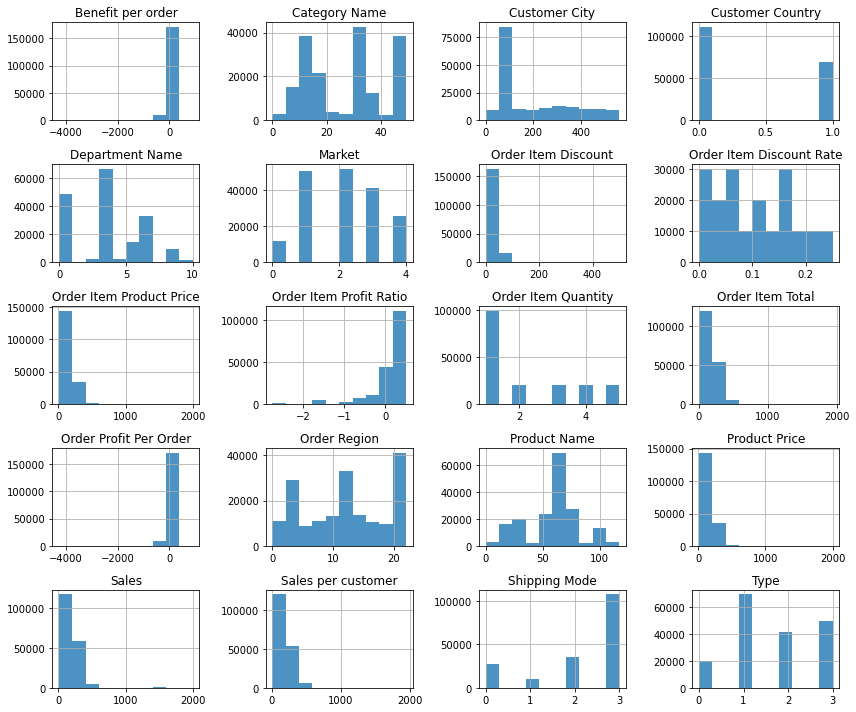

In [14]:
#overview of data Distribution
customer_data.hist(alpha=0.8, figsize=(12, 10))
plt.tight_layout()
plt.show()

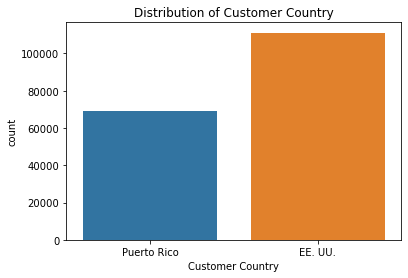

In [15]:
# Customer Country
sns.countplot(x='Customer Country', data=data);
plt.title('Distribution of Customer Country');

Text(0.5, 1.0, 'Top 10 Customer city')

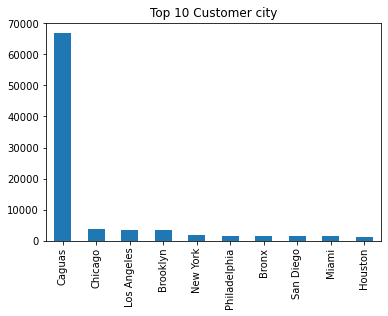

In [16]:
# Top ten Customer City
data['Customer City'].value_counts()[:10].plot(kind='bar')
plt.title("Top 10 Customer city")

Text(0.5, 1.0, 'Distribution of Payment types')

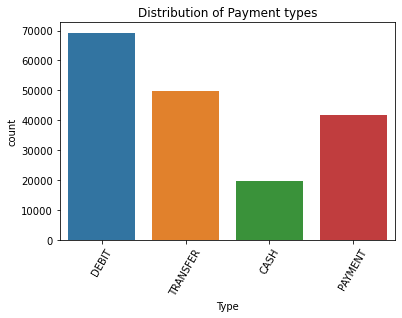

In [17]:
# Payment type
plot = sns.countplot(x='Type', data=data);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
#data['Type'].value_counts().plot(kind='bar')
plt.title("Distribution of Payment types")

Text(0.5, 1.0, 'Top 15 Category of goods')

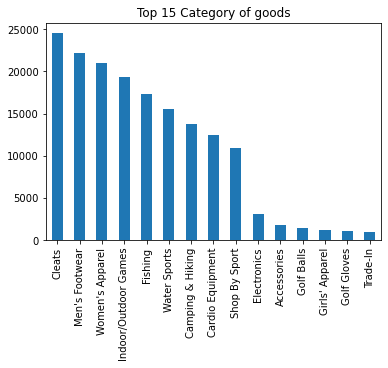

In [18]:
# Top 15 Category of goods
data['Category Name'].value_counts()[:15].plot(kind='bar')
plt.title("Top 15 Category of goods")

Text(0.5, 1.0, 'Departments')

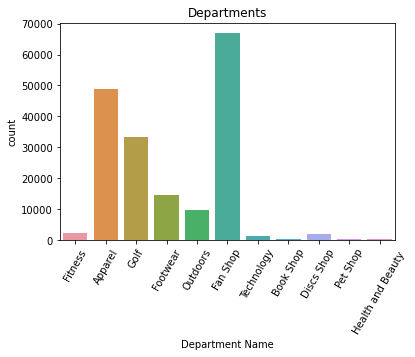

In [19]:
# Department Name
plt.figure(figsize=(6,4))
plot = sns.countplot(x='Department Name', data=data);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
plt.title("Departments")

#data['Department Name'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Market list')

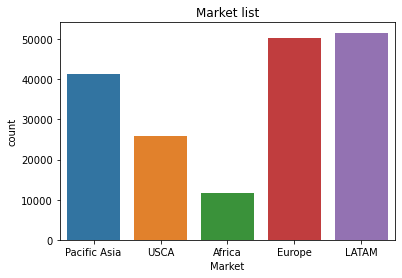

In [20]:
# Market
sns.countplot(x='Market', data=data);

#data['Market'].value_counts().plot(kind='bar')
plt.title("Market list")

Text(0.5, 1.0, 'Order Regions')

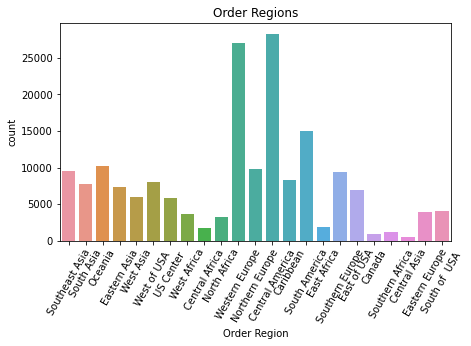

In [21]:
# Order Region
plt.figure(figsize=(7,4))
plot = sns.countplot(x='Order Region', data=data);
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
#data['Order Region'].value_counts().plot(kind='bar')
plt.title("Order Regions")

Text(0.5, 1.0, 'Top 20 Product Name')

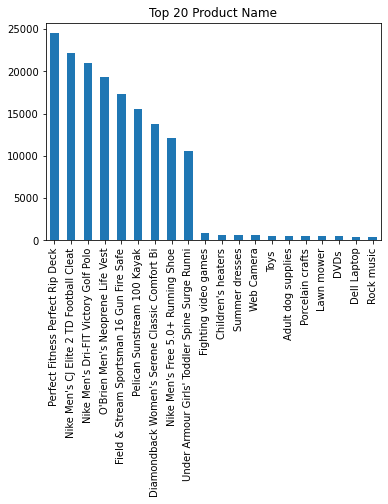

In [22]:
# Top 20 Product Name
data['Product Name'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 Product Name')

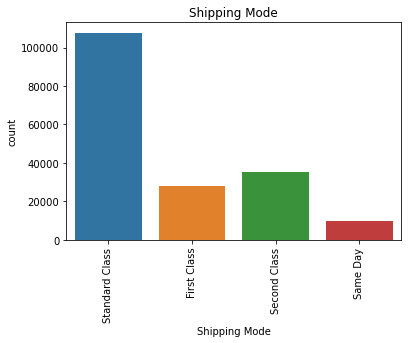

In [23]:
# Shipping Mode
sns.countplot(x='Shipping Mode', data=data)
plt.title('Shipping Mode')
plt.xticks(rotation = 90)
plt.show()

### Correlation analysis

In [24]:
corr_data = data.copy(deep=False)
# drop unused data
corr_data = corr_data.drop(['Category Id','Customer Id','order date (DateOrders)','Product Category Id'], axis=1)

# change object type data into int
from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
cor_data = Change_obj_type(corr_data)

Text(0.5, 141.0, 'xlabel')

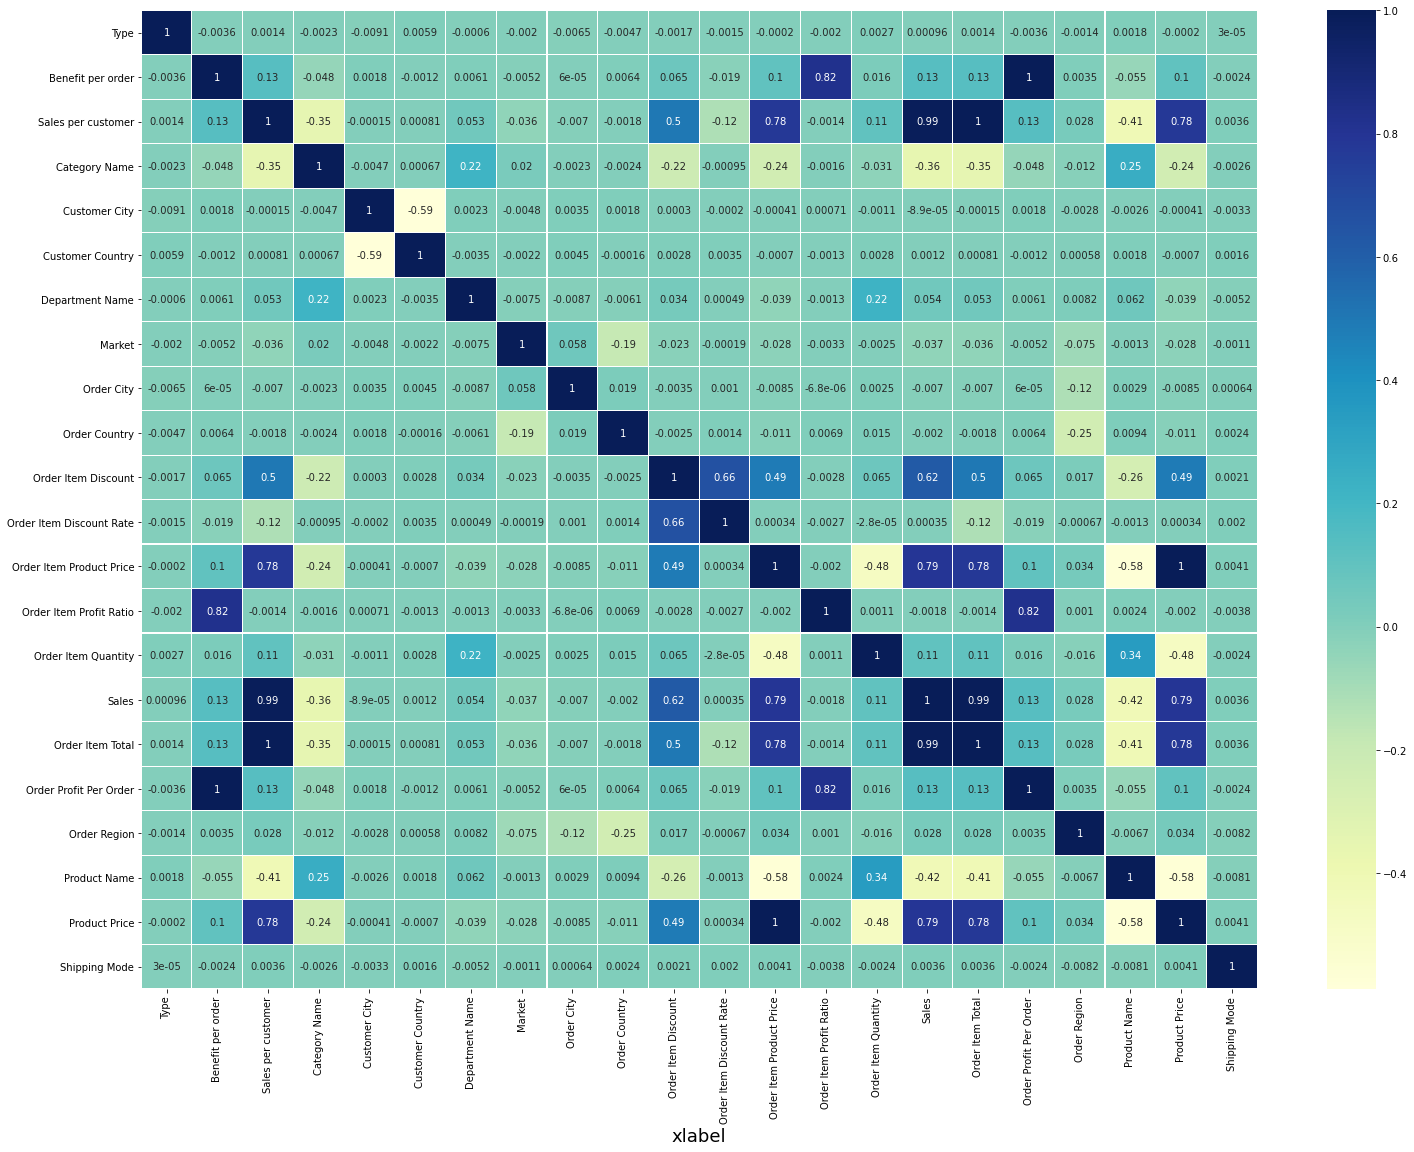

In [25]:
from scipy.stats import norm
corr_m = cor_data.corr()
f, ax = plt.subplots(figsize=(25,18))
plot = sns.heatmap(corr_m, ax = ax,annot = True, cmap ="YlGnBu", linewidths = 0.1)
plt.xlabel('xlabel', fontsize=18)
#plot.figure.savefig("output.png")

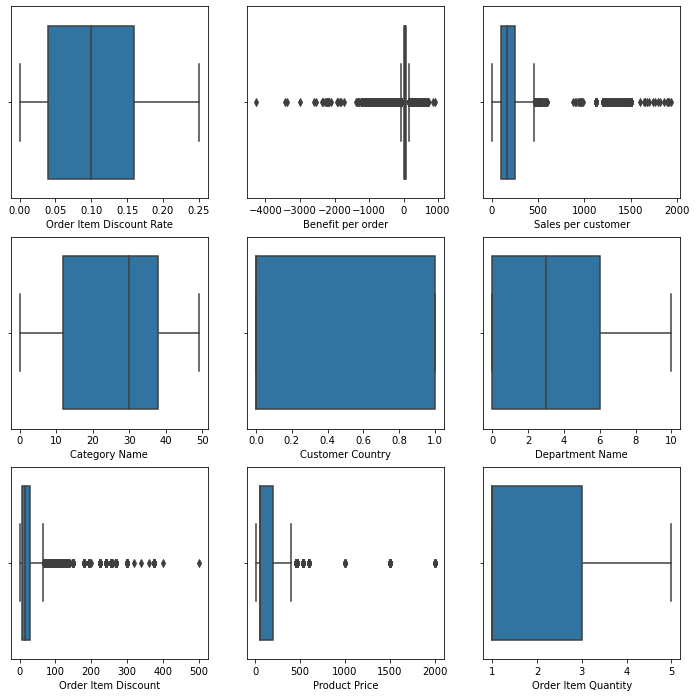

In [26]:
#

plt.figure(figsize=(12, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Order Item Discount Rate', data=cor_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Benefit per order', data=cor_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'Sales per customer', data=cor_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Category Name', data=cor_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'Customer Country', data=cor_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'Department Name', data=cor_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'Order Item Discount', data=cor_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'Product Price', data=cor_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'Order Item Quantity', data=cor_data)
plt.show()

### removing those column have correlation 1

In [27]:
new_data = data.drop(['Order Profit Per Order','Order Item Product Price','Order Item Total'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      180519 non-null  object 
 1   Benefit per order         180519 non-null  float64
 2   Sales per customer        180519 non-null  float64
 3   Category Id               180519 non-null  int64  
 4   Category Name             180519 non-null  object 
 5   Customer City             180519 non-null  object 
 6   Customer Country          180519 non-null  object 
 7   Customer Id               180519 non-null  int64  
 8   Department Name           180519 non-null  object 
 9   Market                    180519 non-null  object 
 10  Order City                180519 non-null  object 
 11  Order Country             180519 non-null  object 
 12  order date (DateOrders)   180519 non-null  object 
 13  Order Item Discount       180519 non-null  f

### Starting date and last date of order

In [28]:
new_data['order date (DateOrders)'].min(), new_data['order date (DateOrders)'].max()

('1/1/2015 0:00', '9/9/2017 9:50')

In [29]:
import datetime as dt
PRASENT_DATE = dt.datetime(2017, 9, 10)
new_data['order date (DateOrders)'] = pd.to_datetime(new_data['order date (DateOrders)'])
new_data.head()

,Type,Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,Department Name,Market,...,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Product Category Id,Product Name,Product Price,Shipping Mode
0,DEBIT,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,Fitness,Pacific Asia,...,13.110000,0.04,0.29,1,327.75,Southeast Asia,73,Smart watch,327.75,Standard Class
1,TRANSFER,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,Fitness,Pacific Asia,...,16.389999,0.05,-0.80,1,327.75,South Asia,73,Smart watch,327.75,Standard Class
2,CASH,-247.779999,309.720001,73,Sporting Goods,San Jose,EE. UU.,19491,Fitness,Pacific Asia,...,18.030001,0.06,-0.80,1,327.75,South Asia,73,Smart watch,327.75,Standard Class
3,DEBIT,22.860001,304.809998,73,Sporting Goods,Los Angeles,EE. UU.,19490,Fitness,Pacific Asia,...,22.940001,0.07,0.08,1,327.75,Oceania,73,Smart watch,327.75,Standard Class
4,PAYMENT,134.210007,298.250000,73,Sporting Goods,Caguas,Puerto Rico,19489,Fitness,Pacific Asia,...,29.500000,0.09,0.45,1,327.75,Oceania,73,Smart watch,327.75,Standard Class


## RFM Analysis

In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Type                      180519 non-null  object        
 1   Benefit per order         180519 non-null  float64       
 2   Sales per customer        180519 non-null  float64       
 3   Category Id               180519 non-null  int64         
 4   Category Name             180519 non-null  object        
 5   Customer City             180519 non-null  object        
 6   Customer Country          180519 non-null  object        
 7   Customer Id               180519 non-null  int64         
 8   Department Name           180519 non-null  object        
 9   Market                    180519 non-null  object        
 10  Order City                180519 non-null  object        
 11  Order Country             180519 non-null  object        
 12  or

In [31]:
new_data['TotalPrice'] = new_data['Order Item Quantity'] * new_data['Product Price']

In [32]:
rfm = new_data.groupby('Customer Id').agg({'order date (DateOrders)':lambda date:(PRASENT_DATE - date.max()).days,
                                           'Order Item Quantity':lambda num:len(num),
                                           'TotalPrice':lambda price:price.sum()})
rfm.columns

Index(['order date (DateOrders)', 'Order Item Quantity', 'TotalPrice'], dtype='object')

In [33]:
# Change the name of columns
rfm.columns=['monetary','frequency','recency']

In [34]:
rfm['recency'] = rfm['recency'].astype(int)
rfm[rfm['monetary']<0]=0

In [35]:
rfm = rfm.drop_duplicates()
rfm

,monetary,frequency,recency
Customer Id,,,
1,648,1,499
2,0,0,0
3,85,18,3537
4,236,14,1719
5,313,7,1274
...,...,...,...
12431,61,36,8073
12432,126,24,5234
12433,32,8,1409


In [36]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [37]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
Customer Id,,,,,,
1,648,1,499,1,4,1
2,0,0,0,1,4,4
3,85,18,3537,3,2,3
4,236,14,1719,2,2,2
5,313,7,1274,1,4,1


In [38]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
Customer Id,,,,,,,
1,648,1,499,1,4,1,141
2,0,0,0,1,4,4,144
3,85,18,3537,3,2,3,323
4,236,14,1719,2,2,2,222
5,313,7,1274,1,4,1,141


In [39]:
# Filter out Top/Best cusotmers
rfm.sort_values(['RFM_Score'],axis=0, ascending=True).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
Customer Id,,,,,,,
4913,391,14,1580,1,2,1,121
3353,171,14,1489,1,2,2,122
11324,341,10,1639,1,3,1,131
9274,420,10,1613,1,3,1,131
8317,354,10,1594,1,3,1,131
